## Exploratory Data Analysis (EDA)

The goal of this analysis is not only to explore the data, but to validate clinical hypotheses regarding diabetes risk factors and to inform downstream feature engineering and modeling decisions.


### Hypothesis 1: Physiological indicators are stronger predictors of diabetes than behavioral factors

In this section, we explore whether objective physiological variables (e.g., BMI, blood pressure, cholesterol) show stronger associations with diabetes prevalence compared to self-reported behavioral indicators such as physical activity and diet.


### Hypothesis 2: Metabolic risk factors are strongly associated with diabetes prevalence

High blood pressure and high cholesterol are core components of metabolic syndrome. In this section, we evaluate whether individuals with these conditions show a higher prevalence of diabetes compared to the general population.

In [2]:
import sys
import os

# Add project root to Python path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

In [8]:
from src.preprocessing import basic_cleaning, engineer_features, prepare_train_test_split
import pandas as pd

df = pd.read_csv("../data/diabetes_binary_health_indicators_BRFSS2015.csv")

## Data Preparation Pipeline
In this step, raw survey data is cleaned, optimized, and transformed using a reusable preprocessing pipeline to ensure data integrity and reproducibility.

In [9]:
df_clean = basic_cleaning(df)
df_features = engineer_features(df_clean)

X_train, X_test, y_train, y_test, scaler = prepare_train_test_split(df_features, 'Diabetes_binary')

Text(0, 0.5, 'Body Mass Index')

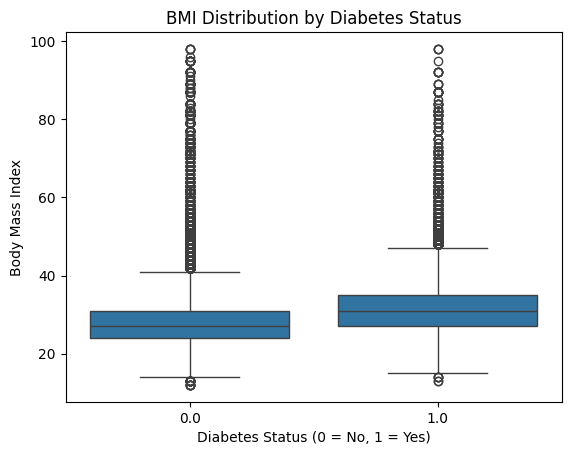

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    data=df,
    x="Diabetes_binary",
    y="BMI"
)

plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Body Mass Index")

**Interpretation**

Individuals diagnosed with diabetes show a higher median BMI compared to non-diabetic individuals, suggesting that excess body weight is a strong physiological risk factor. The presence of extreme outliers further motivates the need for capping to prevent distortion during model training.


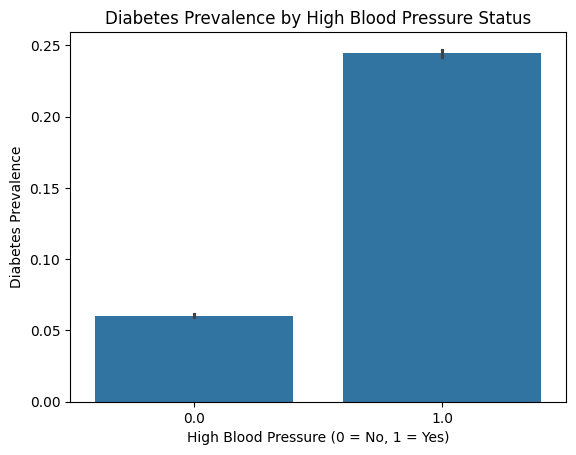

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=df,
    x="HighBP",
    y="Diabetes_binary"
)

plt.title("Diabetes Prevalence by High Blood Pressure Status")
plt.xlabel("High Blood Pressure (0 = No, 1 = Yes)")
plt.ylabel("Diabetes Prevalence")
plt.show()

**Interpretation**

Individuals with high blood pressure show a substantially higher prevalence of diabetes compared to those without hypertension. The magnitude of this difference indicates a strong association between blood pressure status and diabetes risk, supporting the hypothesis that metabolic risk factors play a central role in disease development.

This finding reinforces the importance of including blood pressure-related variables in the modeling pipeline, as they provide valuable signal for early risk stratification in a clinical triage context.